In [82]:
import pandas as pd
import numpy as np
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from collections import Counter

In [2]:
def calc_metrics(tp, tn, fp, fn):
    # balanced accuracy
    se_total = tp + fn
    sp_total = fp + tn

    # Sensitivity / recall / TPR
    se = 0
    if se_total > 0:
        se = tp / se_total

    # Specificity / TNR
    sp = 0
    if sp_total > 0:
        sp = tn / sp_total

    # Balanced accuracy (Sensitivity + specificity) / 2
    bacc = (se + sp) / 2

    # Precision / PPV
    p_total = tp + fp
    p = 0
    if p_total > 0:
        p = tp / p_total

    # F1 score
    f1 = 0
    if (p + se) > 0:
        f1 = 2 * ((p * se)/(p+se))

    # MCC
    mcc = np.nan
    d = math.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
    if d > 0:
        mcc = ((tp * tn) - (fp * fn)) / d

    return [bacc, p, se, sp, f1, mcc]

In [3]:
# dataset
df_pos = pd.read_csv('data/binary_pdbs_classes.csv')
df_neg = pd.read_csv('data/binary_pdb_negatives.csv')
df = pd.concat([df_pos, df_neg])
df = df.loc[df['pdb_residue_id'].notnull()] # filter missing residues
df

/tmp/ipykernel_1241110/3585571110.py:2: DtypeWarning: Columns (3,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pos = pd.read_csv('data/binary_pdbs_classes.csv')
/tmp/ipykernel_1241110/3585571110.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_neg = pd.read_csv('data/binary_pdb_negatives.csv')


,pdb_id,pdb_chain,seqres_index,pdb_residue_id,REGION,CURATED,RDB1,RDB2,CATEGORY,UNIT_CURATED,UNIT_RDB1,UNIT_RDB2,PDB,classes,classes_names,topologies,topologies_names
2,3u3w,B,3,3.0,0,0,1,0,1,0,3u3wB_3_21,0,3u3wB,3,Elongated repeats,3.3,Alpha-solenoid
3,3u3w,B,4,4.0,0,0,1,0,1,0,3u3wB_3_21,0,3u3wB,3,Elongated repeats,3.3,Alpha-solenoid
4,3u3w,B,5,5.0,0,0,1,0,1,0,3u3wB_3_21,0,3u3wB,3,Elongated repeats,3.3,Alpha-solenoid
5,3u3w,B,6,6.0,0,0,1,0,1,0,3u3wB_3_21,0,3u3wB,3,Elongated repeats,3.3,Alpha-solenoid
6,3u3w,B,7,7.0,0,0,1,0,1,0,3u3wB_3_21,0,3u3wB,3,Elongated repeats,3.3,Alpha-solenoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733045,6b9i,A,284,284.0,NaN,0,0,0,0,0,0,0,6b9iA,NaN,NaN,NaN,NaN
733046,6b9i,A,285,285.0,NaN,0,0,0,0,0,0,0,6b9iA,NaN,NaN,NaN,NaN
733047,6b9i,A,286,286.0,NaN,0,0,0,0,0,0,0,6b9iA,NaN,NaN,NaN,NaN
733048,6b9i,A,287,287.0,NaN,0,0,0,0,0,0,0,6b9iA,NaN,NaN,NaN,NaN


In [4]:
# REPEATSDB-LITE EVALUATION (generate tables)

# rdb1
df['TP_1'] = np.where((df['RDB1'] == df['CURATED']) & (df['CURATED'] == 1), 1, 0)
df['TN_1'] = np.where((df['RDB1'] == df['CURATED']) & (df['CURATED'] == 0), 1, 0)
df['FP_1'] = np.where((df['RDB1'] != df['CURATED']) & (df['CURATED'] == 0), 1, 0)
df['FN_1'] = np.where((df['RDB1'] != df['CURATED']) & (df['CURATED'] == 1), 1, 0)

df['TP_2'] = np.where((df['RDB2'] == df['CURATED']) & (df['CURATED'] == 1), 1, 0)
df['TN_2'] = np.where((df['RDB2'] == df['CURATED']) & (df['CURATED'] == 0), 1, 0)
df['FP_2'] = np.where((df['RDB2'] != df['CURATED']) & (df['CURATED'] == 0), 1, 0)
df['FN_2'] = np.where((df['RDB2'] != df['CURATED']) & (df['CURATED'] == 1), 1, 0)

df

,pdb_id,pdb_chain,seqres_index,pdb_residue_id,REGION,CURATED,RDB1,RDB2,CATEGORY,UNIT_CURATED,...,topologies,topologies_names,TP_1,TN_1,FP_1,FN_1,TP_2,TN_2,FP_2,FN_2
2,3u3w,B,3,3.0,0,0,1,0,1,0,...,3.3,Alpha-solenoid,0,0,1,0,0,1,0,0
3,3u3w,B,4,4.0,0,0,1,0,1,0,...,3.3,Alpha-solenoid,0,0,1,0,0,1,0,0
4,3u3w,B,5,5.0,0,0,1,0,1,0,...,3.3,Alpha-solenoid,0,0,1,0,0,1,0,0
5,3u3w,B,6,6.0,0,0,1,0,1,0,...,3.3,Alpha-solenoid,0,0,1,0,0,1,0,0
6,3u3w,B,7,7.0,0,0,1,0,1,0,...,3.3,Alpha-solenoid,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733045,6b9i,A,284,284.0,NaN,0,0,0,0,0,...,NaN,NaN,0,1,0,0,0,1,0,0
733046,6b9i,A,285,285.0,NaN,0,0,0,0,0,...,NaN,NaN,0,1,0,0,0,1,0,0
733047,6b9i,A,286,286.0,NaN,0,0,0,0,0,...,NaN,NaN,0,1,0,0,0,1,0,0
733048,6b9i,A,287,287.0,NaN,0,0,0,0,0,...,NaN,NaN,0,1,0,0,0,1,0,0


In [5]:
df_prot = df.groupby(['pdb_id', 'pdb_chain']).agg({'CATEGORY': 'first', 'seqres_index':'count','TP_1': 'sum', 'TN_1': 'sum', 'FP_1': 'sum', 'FN_1': 'sum', 'TP_2': 'sum', 'TN_2': 'sum', 'FP_2': 'sum', 'FN_2': 'sum'})
df_prot.reset_index(inplace=True)
df_prot

,pdb_id,pdb_chain,CATEGORY,seqres_index,TP_1,TN_1,FP_1,FN_1,TP_2,TN_2,FP_2,FN_2
0,102l,A,0,163,0,71,92,0,0,49,114,0
1,13pk,A,0,415,0,346,69,0,0,217,198,0
2,1a0t,P,1,413,0,2,0,411,353,2,0,58
3,1a0t,Q,1,413,256,0,2,155,192,2,0,219
4,1a12,A,1,401,357,18,0,26,357,6,12,26
...,...,...,...,...,...,...,...,...,...,...,...,...
5252,7w3h,a,1,373,0,161,0,212,155,70,91,57
5253,7w3i,a,1,373,0,161,0,212,152,58,103,60
5254,7w3j,a,1,373,0,161,0,212,194,156,5,18
5255,7w3k,a,1,373,0,161,0,212,204,104,57,8


In [6]:
df_prot.set_index(['pdb_id', 'pdb_chain', 'seqres_index'], inplace=True)
df_prot = df_prot.drop(columns=['CATEGORY'])
df_prot.columns=pd.MultiIndex.from_arrays([['RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB2', 'RDB2', 'RDB2', 'RDB2'], ['TP', 'TN', 'FP', 'FN', 'TP', 'TN', 'FP', 'FN']])
df_prot

RDB1               RDB2               
                                TP   TN  FP   FN   TP   TN   FP   FN
pdb_id pdb_chain seqres_index                                       
102l   A         163             0   71  92    0    0   49  114    0
13pk   A         415             0  346  69    0    0  217  198    0
1a0t   P         413             0    2   0  411  353    2    0   58
       Q         413           256    0   2  155  192    2    0  219
1a12   A         401           357   18   0   26  357    6   12   26
...                            ...  ...  ..  ...  ...  ...  ...  ...
7w3h   a         373             0  161   0  212  155   70   91   57
7w3i   a         373             0  161   0  212  152   58  103   60
7w3j   a         373             0  161   0  212  194  156    5   18
7w3k   a         373             0  161   0  212  204  104   57    8
7wgo   A         276             0  182  94    0    0   88  188    0

[5257 rows x 8 columns]

In [7]:
# tp, tn fp, fn
# bacc, p, se, sp, f1, mcc
print(*df_prot['RDB1'].sum(), calc_metrics(*df_prot['RDB1'].sum()))
print(*df_prot['RDB2'].sum(), calc_metrics(*df_prot['RDB2'].sum()))

451973 756711 220411 557809 [0.6110115008186754, 0.672194757757472, 0.4475946293358368, 0.7744283723015141, 0.5373702714238665, 0.2345815727683996]
768967 461908 515214 240815 [0.6171203941721346, 0.5987995461698935, 0.7615178325618797, 0.4727229557823895, 0.6704266808139451, 0.2449319979510994]


In [8]:
# apply calc_metrics function to each row for both RDB1 and RDB2
data = []
for index, row in df_prot.iterrows():
    # print(*row['RDB1'], *calc_metrics(*row['RDB1']))
    data.append([index[0], index[1], index[2], *row[:4], *calc_metrics(*row['RDB1']), *row[4:], *calc_metrics(*row['RDB2'])])
df_ = pd.DataFrame(data)
df_

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,102l,A,163,0,71,92,0,0.217791,0.000000,0.000000,...,0,49,114,0,0.150307,0.000000,0.000000,0.300613,0.000000,NaN
1,13pk,A,415,0,346,69,0,0.416867,0.000000,0.000000,...,0,217,198,0,0.261446,0.000000,0.000000,0.522892,0.000000,NaN
2,1a0t,P,413,0,2,0,411,0.500000,0.000000,0.000000,...,353,2,0,58,0.929440,1.000000,0.858881,1.000000,0.924084,0.169202
3,1a0t,Q,413,256,0,2,155,0.311436,0.992248,0.622871,...,192,2,0,219,0.733577,1.000000,0.467153,1.000000,0.636816,0.065020
4,1a12,A,401,357,18,0,26,0.966057,1.000000,0.932115,...,357,6,12,26,0.632724,0.967480,0.932115,0.333333,0.949468,0.202828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252,7w3h,a,373,0,161,0,212,0.500000,0.000000,0.000000,...,155,70,91,57,0.582957,0.630081,0.731132,0.434783,0.676856,0.173419
5253,7w3i,a,373,0,161,0,212,0.500000,0.000000,0.000000,...,152,58,103,60,0.538615,0.596078,0.716981,0.360248,0.650964,0.082253
5254,7w3j,a,373,0,161,0,212,0.500000,0.000000,0.000000,...,194,156,5,18,0.942019,0.974874,0.915094,0.968944,0.944039,0.877710
5255,7w3k,a,373,0,161,0,212,0.500000,0.000000,0.000000,...,204,104,57,8,0.804113,0.781609,0.962264,0.645963,0.862579,0.657230


In [9]:
df_.columns=pd.MultiIndex.from_arrays([[None, None, None, 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2'], ['pdb_id', 'pdb_chain', 'length', 'TP', 'TN', 'FP', 'FN', 'bacc', 'p', 'se', 'sp', 'f1', 'mcc', 'TP', 'TN', 'FP', 'FN', 'bacc', 'p', 'se', 'sp', 'f1', 'mcc']])
df_

NaN                  RDB1                                              \
     pdb_id pdb_chain length   TP   TN  FP   FN      bacc         p        se   
0      102l         A    163    0   71  92    0  0.217791  0.000000  0.000000   
1      13pk         A    415    0  346  69    0  0.416867  0.000000  0.000000   
2      1a0t         P    413    0    2   0  411  0.500000  0.000000  0.000000   
3      1a0t         Q    413  256    0   2  155  0.311436  0.992248  0.622871   
4      1a12         A    401  357   18   0   26  0.966057  1.000000  0.932115   
...     ...       ...    ...  ...  ...  ..  ...       ...       ...       ...   
5252   7w3h         a    373    0  161   0  212  0.500000  0.000000  0.000000   
5253   7w3i         a    373    0  161   0  212  0.500000  0.000000  0.000000   
5254   7w3j         a    373    0  161   0  212  0.500000  0.000000  0.000000   
5255   7w3k         a    373    0  161   0  212  0.500000  0.000000  0.000000   
5256   7wgo         A    276    0  182  94    0  0.329710  0.000000  0.000000   

      ... RDB2                                                         \
      ...   TP   TN   FP   FN      bacc         p        se        sp   
0     ...    0   49  114    0  0.150307  0.000000  0.000000  0.300613   
1     ...    0  217  198    0  0.261446  0.000000  0.000000  0.522892   
2     ...  353    2    0   58  0.929440  1.000000  0.858881  1.000000   
3     ...  192    2    0  219  0.733577  1.000000  0.467153  1.000000   
4     ...  357    6   12   26  0.632724  0.967480  0.932115  0.333333   
...   ...  ...  ...  ...  ...       ...       ...       ...       ...   
5252  ...  155   70   91   57  0.582957  0.630081  0.731132  0.434783   
5253  ...  152   58  103   60  0.538615  0.596078  0.716981  0.360248   
5254  ...  194  156    5   18  0.942019  0.974874  0.915094  0.968944   
5255  ...  204  104   57    8  0.804113  0.781609  0.962264  0.645963   
5256  ...    0   88  188    0  0.159420  0.000000  0.000000  0.318841   

                          
            f1       mcc  
0     0.000000       NaN  
1     0.000000       NaN  
2     0.924084  0.169202  
3     0.636816  0.065020  
4     0.949468  0.202828  
...        ...       ...  
5252  0.676856  0.173419  
5253  0.650964  0.082253  
5254  0.944039  0.877710  
5255  0.862579  0.657230  
5256  0.000000       NaN  

[5257 rows x 23 columns]

In [10]:
df_.loc[:, ('RDB1', ['bacc', 'p', 'se', 'sp', 'f1', 'mcc'])]

RDB1                                                  
          bacc         p        se        sp        f1       mcc
0     0.217791  0.000000  0.000000  0.435583  0.000000       NaN
1     0.416867  0.000000  0.000000  0.833735  0.000000       NaN
2     0.500000  0.000000  0.000000  1.000000  0.000000       NaN
3     0.311436  0.992248  0.622871  0.000000  0.765321 -0.054069
4     0.966057  1.000000  0.932115  1.000000  0.964865  0.617511
...        ...       ...       ...       ...       ...       ...
5252  0.500000  0.000000  0.000000  1.000000  0.000000       NaN
5253  0.500000  0.000000  0.000000  1.000000  0.000000       NaN
5254  0.500000  0.000000  0.000000  1.000000  0.000000       NaN
5255  0.500000  0.000000  0.000000  1.000000  0.000000       NaN
5256  0.329710  0.000000  0.000000  0.659420  0.000000       NaN

[5257 rows x 6 columns]

<Axes: >

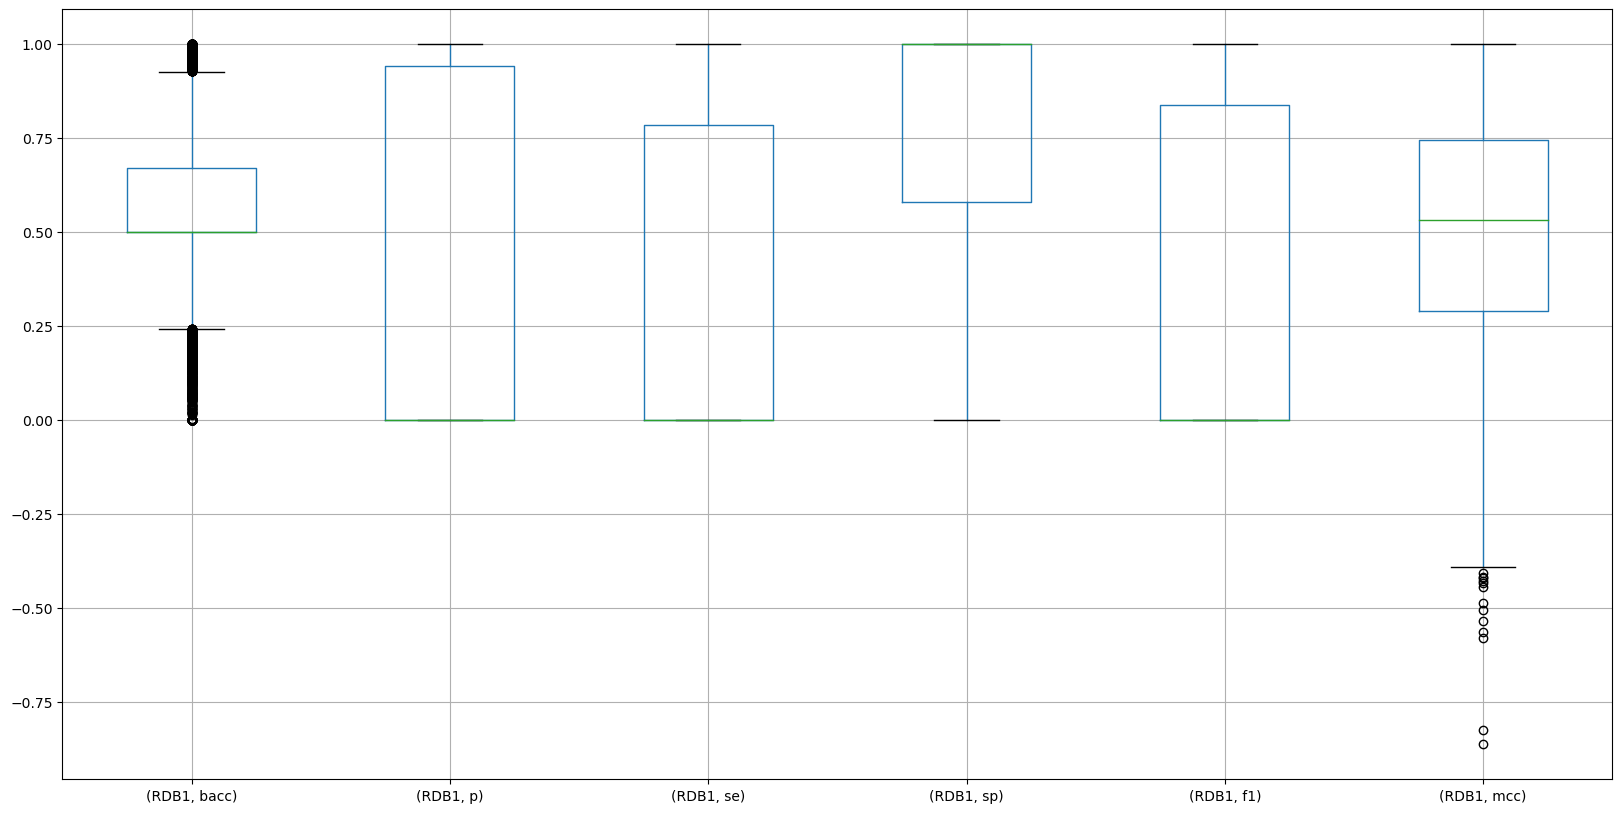

In [11]:
df_.loc[:,('RDB1', ['bacc', 'p', 'se', 'sp', 'f1', 'mcc'])].boxplot(figsize=(20,10))




In [12]:
# df_.loc[:,(slice(None), ['bacc', 'p', 'se', 'sp', 'f1', 'mcc'])].boxplot(figsize=(20,10))

In [97]:
# table residue overlap level
table_pt1 = df_.loc[:,('RDB1', ['bacc', 'p', 'se', 'sp', 'f1', 'mcc'])].mean()
table_pt1_sum = df_.loc[:,('RDB1', ['TP', 'TN', 'FP', 'FN'])].sum()
table_pt2 = df_.loc[:,('RDB2', ['bacc', 'p', 'se', 'sp', 'f1', 'mcc'])].mean()
table_pt2_sum = df_.loc[:,('RDB2', ['TP', 'TN', 'FP', 'FN'])].sum()
table_pt1, table_pt2, table_pt1_sum, table_pt2_sum

(RDB1  bacc    0.534322
       p       0.325987
       se      0.293841
       sp      0.774803
       f1      0.303614
       mcc     0.503054
 dtype: float64,
 RDB2  bacc    0.552875
       p       0.563785
       se      0.495125
       sp      0.610625
       f1      0.511059
       mcc     0.330527
 dtype: float64,
 RDB1  TP    451973
       TN    756711
       FP    220411
       FN    557809
 dtype: int64,
 RDB2  TP    768967
       TN    461908
       FP    515214
       FN    240815
 dtype: int64)

In [76]:
# PLOTS: GROUP BY TOPOLOGY, CALC METRICS AND PLOT

# remove the ones with 2 topologies definition for simplification
df_topologies = df[~df["topologies"].astype(str).str.contains(';')]
df_topologies = df_topologies[df_topologies["topologies"].notna()]
df_topologies['topologies'] = df_topologies['topologies'].astype(str)
df_top = df_topologies.groupby(['topologies']).agg({'TP_1': 'sum', 'TN_1': 'sum', 'FP_1': 'sum', 'FN_1': 'sum', 'TP_2': 'sum', 'TN_2': 'sum', 'FP_2': 'sum', 'FN_2': 'sum'})


df_top.columns=pd.MultiIndex.from_arrays([['RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB2', 'RDB2', 'RDB2', 'RDB2'], ['TP', 'TN', 'FP', 'FN', 'TP', 'TN', 'FP', 'FN']])
df_top


RDB1                           RDB2                     
                TP      TN     FP      FN      TP     TN     FP     FN
topologies                                                            
3.1          21800   23678   1469   24400   37140  12389  12758   9060
3.2          25852    8691    466   24801   36120   6589   2568  14533
3.3         143962  105461  16938  133984  241743  53277  69122  36203
3.4           3866    8736    411    6990    8528   4776   4371   2328
3.6              0     222      0   21944   17145    186     36   4799
4.1          73809   35322   6204   76248  105108  22665  18861  44949
4.10          1699      90     17    1097    1122     94     13   1674
4.2          28166   16777   2247   47295   51967  10038   8986  23494
4.3            268     754    110     626     351    430    434    543
4.4         102964   39899   3794  147209  178547  31543  12150  71626
4.5          13328    1483     41   18208   25860   1289    235   5676
4.6           6331     823    271    2016    6435    698    396   1912
4.7            224       0      1       0     108      1      0    116
4.9           5780    1915    370    1279    5041   1324    961   2018
5.1            753      10     11     492     825      9     12    420
5.2           3558     646     20    3651    5439    377    289   1770
5.3           1443     138      8    2062    2317    132     14   1188
5.4           4127     861    109    7541    8015    906     64   3653
5.5           1783     172      7    4656    3757    177      2   2682

In [77]:
# apply calc_metrics function to each row for both RDB1 and RDB2
data = []
for index, row in df_top.iterrows():
    data.append([index, *row[:4], *calc_metrics(*row['RDB1']), *row[4:], *calc_metrics(*row['RDB2'])])
df_top = pd.DataFrame(data)
df_top

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,3.1,21800,23678,1469,24400,0.706722,0.936869,0.471861,0.941583,0.627618,...,37140,12389,12758,9060,0.648280,0.744318,0.803896,0.492663,0.772961,0.308980
1,3.2,25852,8691,466,24801,0.729742,0.982293,0.510375,0.949110,0.671734,...,36120,6589,2568,14533,0.716323,0.933623,0.713087,0.719559,0.808587,0.325954
2,3.3,143962,105461,16938,133984,0.689783,0.894730,0.517950,0.861617,0.656093,...,241743,53277,69122,36203,0.652511,0.777646,0.869748,0.435273,0.821123,0.337326
3,3.4,3866,8736,411,6990,0.655592,0.903905,0.356116,0.955067,0.510936,...,8528,4776,4371,2328,0.653847,0.661137,0.785556,0.522138,0.717996,0.320306
4,3.6,0,222,0,21944,0.500000,0.000000,0.000000,1.000000,0.000000,...,17145,186,36,4799,0.809572,0.997905,0.781307,0.837838,0.876422,0.147662
5,4.1,73809,35322,6204,76248,0.671236,0.922463,0.491873,0.850600,0.641622,...,105108,22665,18861,44949,0.623128,0.847857,0.700454,0.545803,0.767139,0.212325
6,4.10,1699,90,17,1097,0.724388,0.990093,0.607654,0.841121,0.753103,...,1122,94,13,1674,0.639896,0.988546,0.401288,0.878505,0.570847,0.108033
7,4.2,28166,16777,2247,47295,0.627569,0.926117,0.373252,0.881886,0.532066,...,51967,10038,8986,23494,0.608155,0.852575,0.688660,0.527649,0.761901,0.181285
8,4.3,268,754,110,626,0.586231,0.708995,0.299776,0.872685,0.421384,...,351,430,434,543,0.445151,0.447134,0.392617,0.497685,0.418106,-0.110314
9,4.4,102964,39899,3794,147209,0.662369,0.964462,0.411571,0.913167,0.576941,...,178547,31543,12150,71626,0.717809,0.936286,0.713694,0.721923,0.809976,0.324702


In [78]:
# # # plot
df_top.rename(columns={0: 'topologies'}, inplace=True)
df_top[['c', 't']] = df_top['topologies'].str.split('.', expand=True)
df_top["t"] = pd.to_numeric(df_top["t"])
df_top = df_top.sort_values(['c', 't'])
df_top

,topologies,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,c,t
0,3.1,21800,23678,1469,24400,0.706722,0.936869,0.471861,0.941583,0.627618,...,12758,9060,0.648280,0.744318,0.803896,0.492663,0.772961,0.308980,3,1
1,3.2,25852,8691,466,24801,0.729742,0.982293,0.510375,0.949110,0.671734,...,2568,14533,0.716323,0.933623,0.713087,0.719559,0.808587,0.325954,3,2
2,3.3,143962,105461,16938,133984,0.689783,0.894730,0.517950,0.861617,0.656093,...,69122,36203,0.652511,0.777646,0.869748,0.435273,0.821123,0.337326,3,3
3,3.4,3866,8736,411,6990,0.655592,0.903905,0.356116,0.955067,0.510936,...,4371,2328,0.653847,0.661137,0.785556,0.522138,0.717996,0.320306,3,4
4,3.6,0,222,0,21944,0.500000,0.000000,0.000000,1.000000,0.000000,...,36,4799,0.809572,0.997905,0.781307,0.837838,0.876422,0.147662,3,6
5,4.1,73809,35322,6204,76248,0.671236,0.922463,0.491873,0.850600,0.641622,...,18861,44949,0.623128,0.847857,0.700454,0.545803,0.767139,0.212325,4,1
7,4.2,28166,16777,2247,47295,0.627569,0.926117,0.373252,0.881886,0.532066,...,8986,23494,0.608155,0.852575,0.688660,0.527649,0.761901,0.181285,4,2
8,4.3,268,754,110,626,0.586231,0.708995,0.299776,0.872685,0.421384,...,434,543,0.445151,0.447134,0.392617,0.497685,0.418106,-0.110314,4,3
9,4.4,102964,39899,3794,147209,0.662369,0.964462,0.411571,0.913167,0.576941,...,12150,71626,0.717809,0.936286,0.713694,0.721923,0.809976,0.324702,4,4
10,4.5,13328,1483,41,18208,0.697863,0.996933,0.422628,0.973097,0.593609,...,235,5676,0.832908,0.990994,0.820015,0.845801,0.897434,0.342382,4,5


In [79]:
df_top.columns=pd.MultiIndex.from_arrays([['id', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB1', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'RDB2', 'id', 'id'], ['topologies', 'TP', 'TN', 'FP', 'FN', 'bacc', 'p', 'se', 'sp', 'f1', 'mcc', 'TP', 'TN', 'FP', 'FN', 'bacc', 'p', 'se', 'sp', 'f1', 'mcc', 'c', 't']])
df_top

id    RDB1                                                       \
   topologies      TP      TN     FP      FN      bacc         p        se   
0         3.1   21800   23678   1469   24400  0.706722  0.936869  0.471861   
1         3.2   25852    8691    466   24801  0.729742  0.982293  0.510375   
2         3.3  143962  105461  16938  133984  0.689783  0.894730  0.517950   
3         3.4    3866    8736    411    6990  0.655592  0.903905  0.356116   
4         3.6       0     222      0   21944  0.500000  0.000000  0.000000   
5         4.1   73809   35322   6204   76248  0.671236  0.922463  0.491873   
7         4.2   28166   16777   2247   47295  0.627569  0.926117  0.373252   
8         4.3     268     754    110     626  0.586231  0.708995  0.299776   
9         4.4  102964   39899   3794  147209  0.662369  0.964462  0.411571   
10        4.5   13328    1483     41   18208  0.697863  0.996933  0.422628   
11        4.6    6331     823    271    2016  0.755381  0.958952  0.758476   
12        4.7     224       0      1       0  0.500000  0.995556  1.000000   
13        4.9    5780    1915    370    1279  0.828444  0.939837  0.818813   
6        4.10    1699      90     17    1097  0.724388  0.990093  0.607654   
14        5.1     753      10     11     492  0.540505  0.985602  0.604819   
15        5.2    3558     646     20    3651  0.731760  0.994410  0.493550   
16        5.3    1443     138      8    2062  0.678452  0.994487  0.411698   
17        5.4    4127     861    109    7541  0.620666  0.974268  0.353702   
18        5.5    1783     172      7    4656  0.618900  0.996089  0.276906   

                        ...   RDB2                                       \
          sp        f1  ...     FP     FN      bacc         p        se   
0   0.941583  0.627618  ...  12758   9060  0.648280  0.744318  0.803896   
1   0.949110  0.671734  ...   2568  14533  0.716323  0.933623  0.713087   
2   0.861617  0.656093  ...  69122  36203  0.652511  0.777646  0.869748   
3   0.955067  0.510936  ...   4371   2328  0.653847  0.661137  0.785556   
4   1.000000  0.000000  ...     36   4799  0.809572  0.997905  0.781307   
5   0.850600  0.641622  ...  18861  44949  0.623128  0.847857  0.700454   
7   0.881886  0.532066  ...   8986  23494  0.608155  0.852575  0.688660   
8   0.872685  0.421384  ...    434    543  0.445151  0.447134  0.392617   
9   0.913167  0.576941  ...  12150  71626  0.717809  0.936286  0.713694   
10  0.973097  0.593609  ...    235   5676  0.832908  0.990994  0.820015   
11  0.752285  0.847013  ...    396   1912  0.704481  0.942029  0.770936   
12  0.000000  0.997773  ...      0    116  0.741071  1.000000  0.482143   
13  0.838074  0.875161  ...    961   2018  0.646777  0.839887  0.714124   
6   0.841121  0.753103  ...     13   1674  0.639896  0.988546  0.401288   
14  0.476190  0.749627  ...     12    420  0.545611  0.985663  0.662651   
15  0.969970  0.659683  ...    289   1770  0.660270  0.949546  0.754474   
16  0.945205  0.582324  ...     14   1188  0.782583  0.993994  0.661056   
17  0.887629  0.518989  ...     64   3653  0.810471  0.992078  0.686921   
18  0.960894  0.433345  ...      2   2682  0.786151  0.999468  0.583476   

                                 id      
          sp        f1       mcc  c   t  
0   0.492663  0.772961  0.308980  3   1  
1   0.719559  0.808587  0.325954  3   2  
2   0.435273  0.821123  0.337326  3   3  
3   0.522138  0.717996  0.320306  3   4  
4   0.837838  0.876422  0.147662  3   6  
5   0.545803  0.767139  0.212325  4   1  
7   0.527649  0.761901  0.181285  4   2  
8   0.497685  0.418106 -0.110314  4   3  
9   0.721923  0.809976  0.324702  4   4  
10  0.845801  0.897434  0.342382  4   5  
11  0.638026  0.847938  0.292680  4   6  
12  1.000000  0.650602  0.064194  4   7  
13  0.579431  0.771916  0.263241  4   9  
6   0.878505  0.570847  0.108033  4  10  
14  0.428571  0.792507  0.024615  5   1  
15  0.566066  0.840844  0.200281  5   2  
16  0.904110  0.794037  0.230482  5   3 

In [90]:
# plot
x = ['3.1 Beta-solenoid', '3.2 Alpha/beta solenoid',
     '3.3 Alpha-solenoid', '3.4 Beta hairpins', '3.6 Box', '4.1 TIM-barrel', '4.2 Beta-barrel / beta hairpins',
     '4.3 Beta-trefoil', '4.4 Propeller', '4.5 Alpha/beta prism',
     '4.6 Alpha-barrel', '4.7 Alpha/beta barrel','4.9 Alpha/beta trefoil',  '4.10 Aligned prism',
     '5.1 Alpha-beads', '5.2 Beta-beads', '5.3 Alpha/beta-beads', '5.4 Beta sandwich beads', '5.5 Alpha/beta sandwich beads']

# RDBL 1

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(
    y= np.array(df_top[('RDB2','bacc')].values.tolist()) -  np.array(df_top[('RDB1','bacc')].values.tolist()),
    x=x,
    name='accuracy',
    marker_color='#EDAE49'
), row=1, col=1)
fig.add_trace(go.Bar(
    y=np.array(df_top[('RDB2','p')].values.tolist()) - np.array(df_top[('RDB1','p')].values.tolist()),
    x=x,
    name='precision',
    marker_color='#D1495B'
), row=1, col=1)
fig.add_trace(go.Bar(
    y=np.array(df_top[('RDB2','se')].values.tolist()) - np.array(df_top[('RDB1','se')].values.tolist()),
    x=x,
    name='recall',
    marker_color='#00798C'
), row=1, col=1)
fig.add_trace(go.Bar(
    y=np.array(df_top[('RDB2','f1')].values.tolist()) - np.array(df_top[('RDB1','f1')].values.tolist()),
    x=x,
    name='f-score',
    marker_color='#003D5B'
), row=1, col=1)

In [91]:
 # PDBS distribution
df_pdbs = pd.DataFrame.from_dict(Counter(df_topologies['topologies']), orient='index', columns=['#PDBs'])

fig.add_trace(go.Bar(
    y=df_pdbs['#PDBs'].values.tolist(),
    x=x,
    name='PDBs',
    marker_color='#003D5F'
), row=2, col=1)
fig.update_layout(title='RepeatsDB-lite2 - RepeatsDB-lite1', width=1000, height=1000)
fig.write_image("plots/a_p_r_m_dataset_rdb3.png")

In [89]:
# RDBL 1

fig1 = make_subplots(rows=1, cols=1)
fig1.add_trace(go.Bar(
    y= df_top[('RDB1','bacc')].values.tolist(),
    x=x,
    name='accuracy',
    marker_color='#EDAE49'
), row=1, col=1)
fig1.add_trace(go.Bar(
    y=df_top[('RDB1','p')].values.tolist(),
    x=x,
    name='precision',
    marker_color='#D1495B'
), row=1, col=1)
fig1.add_trace(go.Bar(
    y=df_top[('RDB1','se')].values.tolist(),
    x=x,
    name='recall',
    marker_color='#00798C'
), row=1, col=1)
fig1.add_trace(go.Bar(
    y=df_top[('RDB2','f1')].values.tolist(),
    x=x,
    name='f-score',
    marker_color='#003D5B'
), row=1, col=1)
fig1.write_image("plots/a_p_r_m_dataset_rdb1.png")

In [88]:
# RDBL 2

fig2 = make_subplots(rows=1, cols=1)
fig2.add_trace(go.Bar(
    y= df_top[('RDB2','bacc')].values.tolist(),
    x=x,
    name='accuracy',
    marker_color='#EDAE49'
), row=1, col=1)
fig2.add_trace(go.Bar(
    y=df_top[('RDB2','p')].values.tolist(),
    x=x,
    name='precision',
    marker_color='#D1495B'
), row=1, col=1)
fig2.add_trace(go.Bar(
    y=df_top[('RDB2','se')].values.tolist(),
    x=x,
    name='recall',
    marker_color='#00798C'
), row=1, col=1)
fig2.add_trace(go.Bar(
    y=df_top[('RDB2','f1')].values.tolist(),
    x=x,
    name='f-score',
    marker_color='#003D5B'
), row=1, col=1)
fig2.write_image("plots/a_p_r_m_dataset_rdb2.png")